# Regresja liniowa

Naszym Celem jest empityczne sprawdzenie twierdzenia:

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.

Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia

$$
x_0 = \mathrm{argmin} \{ x \in \mathbb{R}^K   \colon \| Ax - y \|^2 \}
$$

wtedy i tylko wtedy gdy

$$
A^TA x_0 = A^Ty.
$$


In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę wykres funkcji w kształcie 

$
f(x)=x^2
$ 

na odcinku $[0,3]$ i go narysować.

Będzie to model, który będziemy chcieli znaleźć.

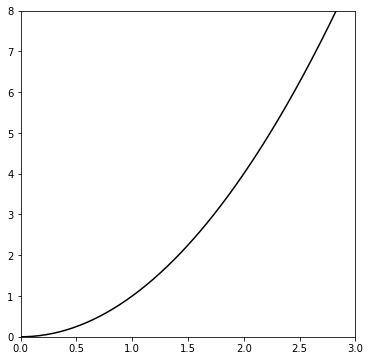

In [3]:
f = lambda x: (x**2)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], 'k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)=x^2$.

Na ich podstawie będziemy wykonywać naszej presykcji.

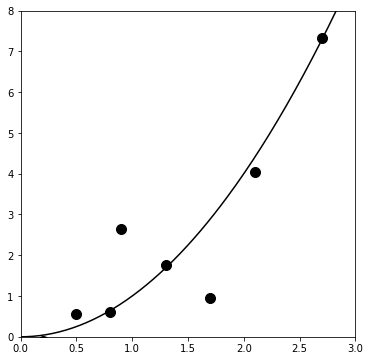

In [4]:
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, 'k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [5]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)

[2.51366504]
-0.9809620639248879


Definiujemy naszą funkcję regresji

In [6]:
f_lr = lambda x: lr.coef_ * x +lr.intercept_

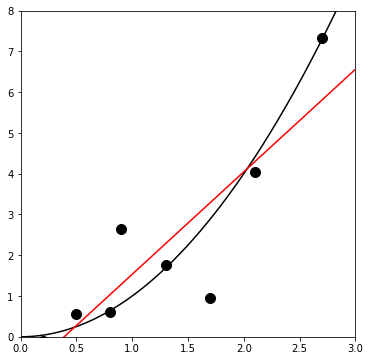

In [9]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, 'k');
plt.plot(x_f_lr, y_f_lr, 'r');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Teraz możemy wykonać predykcję dla punktu 
$$
x_0 = 1.5
$$

In [10]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

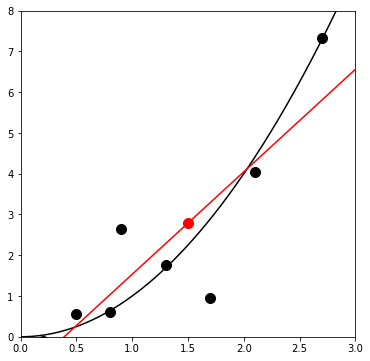

In [12]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, 'k');
plt.plot(x_f_lr, y_f_lr, 'r');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()

Możemy wypisać miarę dopasowania $R^2$. Narazie nie wnikamy w to co ona oznacza.

In [13]:
from sklearn.metrics import r2_score
print(lr.score(x[:, np.newaxis], y))
print(r2_score(lr.predict(x[:, np.newaxis]), y))

0.7527244124065844
0.6714925362885005


# Zadanie 1
Stwórz macierz postaci:
$$
A=\begin{bmatrix}
x_1 & 1\\
\ddots & \ddots\\
x_n & 1\\
\end{bmatrix}
$$

i rozwiąż równanie

$$
A^TA x = A^Ty.
$$

gdzie (x,y) to nasz zbiór treningowy. 

Użyj funkcji <tt>linalg.solve</tt>.

In [57]:
import random
n=100
data = np.random.uniform(size=n)
f = lambda x: x**3 + 4*x**2 + x + 32 + np.random.normal(0,0.1,1)
y=f(data)
onez = np.ones(100)
data = np.transpose([data])
onez = np.transpose([onez])
A=np.append(data, onez, axis=1)

In [61]:
np.linalg.solve(np.matmul(np.transpose(A), A), np.matmul(np.transpose(A),y))

array([ 6.17101746, 31.01608411])

In [63]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(data, y);
print(lr.coef_)
print(lr.intercept_)

[6.17101746]
31.01608410752971


# Zadanie 3
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

# Zadanie 4
Zminimalizuj funkcją $\mathrm{compute\_error}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

# Zadanie 5
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error\_1}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

# Zadanie 6
Zminimalizuj funkcją $\mathrm{compute\_error\_1}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

# Zadanie 7
Wykonaj dwie powyższe regresję na danych z wartością odstającą.


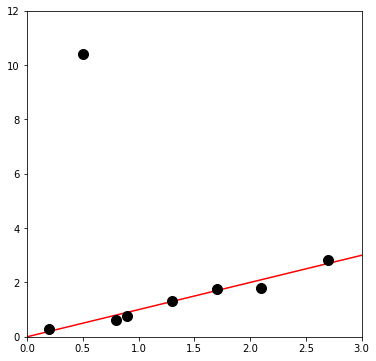

In [106]:
f = lambda x: (x)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))/5
y[1]=y[1]+10
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, 'r');
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [95]:
points = np.column_stack((x,y))

In [114]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
xr=x.reshape(-1, 1)
yr=y.reshape(-1, 1)

lr.fit(xr, yr);
print(lr.coef_)
print(lr.intercept_)

f_fit = lambda x: lr.predict(x.reshape(-1, 1))

[[-0.41398861]]
[3.08080044]


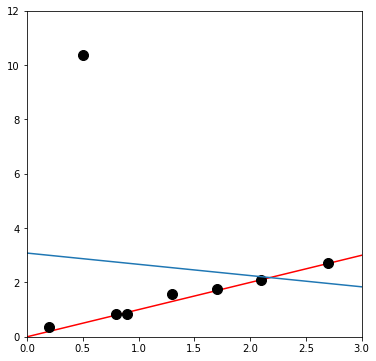

In [116]:
f = lambda x: (x)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))/5
y[1]=y[1]+10
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, 'r')
plt.plot(x, y, 'ok', ms=10)

plt.plot(x_tr, f_fit(x_tr))

plt.show()